# Dataset

This project utilizes artificial data to analyze the historical data and give the company directors insights on how the sales were affected during times of recession. 

**Variables**

- Date: The date of the observation.
- Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
- Automobile_Sales: The number of vehicles sold during the period.
- GDP: The per capita GDP value in USD.
- Unemployment_Rate: The monthly unemployment rate.
- Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
- Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
- Price: The average vehicle price during the period.
- Advertising_Expenditure: The advertising expenditure of the company.
- Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.
- Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
- Month: Month of the observation extracted from Date.
- Year: Year of the observation extracted from Date.


### Importing Required Libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline
import warnings

In [119]:
warnings.simplefilter(action='ignore', category=FutureWarning) # to ignore warnings

### Importing and Preprocessing Data

In [120]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

In [121]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [122]:
pd.set_option('display.max_columns', None)

In [123]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

In [124]:
df.isna().sum() # no NA values

Date                       0
Year                       0
Month                      0
Recession                  0
Consumer_Confidence        0
Seasonality_Weight         0
Price                      0
Advertising_Expenditure    0
Competition                0
GDP                        0
Growth_Rate                0
unemployment_rate          0
Automobile_Sales           0
Vehicle_Type               0
City                       0
dtype: int64

In [125]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [126]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### Visualization

##### 1.1 Plotting the yearly average automobile sales

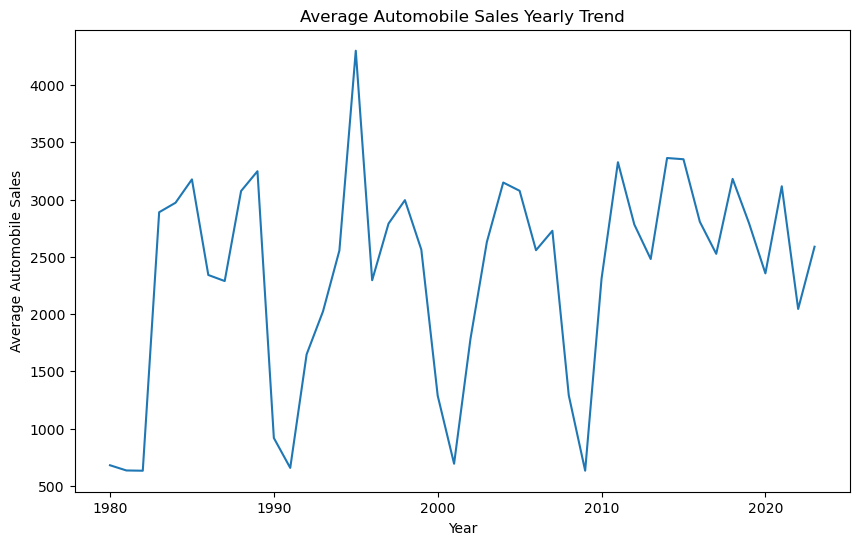

In [127]:
# Grouping dataframe by sales average per year
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales Yearly Trend')
plt.show()

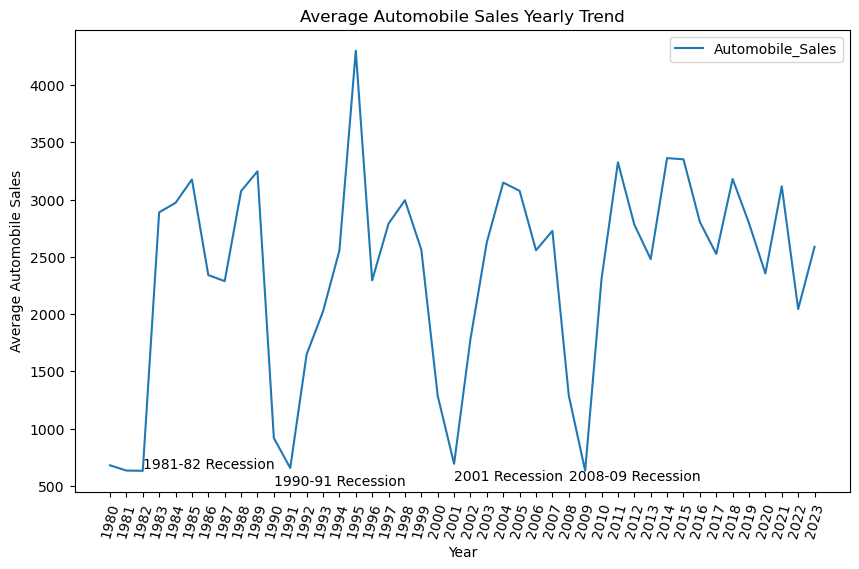

In [128]:
# Adding ticks on x- axis with all the years, to identify the years of recession

plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales Yearly Trend')
plt.text(1982, 650, '1981-82 Recession')
plt.text(1990, 500, '1990-91 Recession')
plt.text(2001, 550, '2001 Recession')
plt.text(2008, 550, '2008-09 Recession')
plt.legend()
plt.show()

##### 1.2 Plotting different lines for categories of vehicle type and analyse the trend. Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [129]:
# Filtering dataframe for recession records only
df_recession = df[df['Recession']==1]

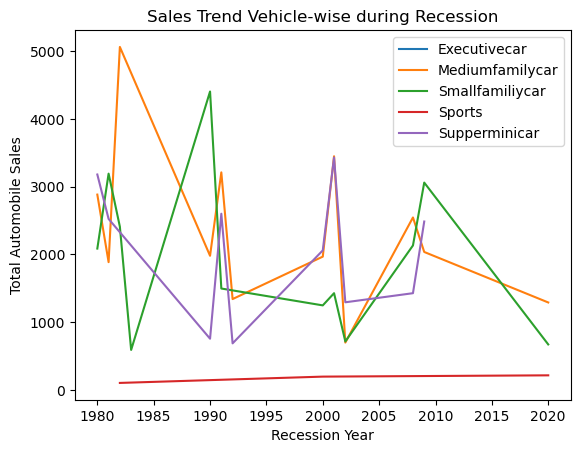

In [130]:
df_Mline = df_recession .groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Recession Year')
plt.ylabel('Total Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

##### Inference:  During recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle while sales of the superminicar and smallfamilycar increased.

##### 1.3 Using Seaborn library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period

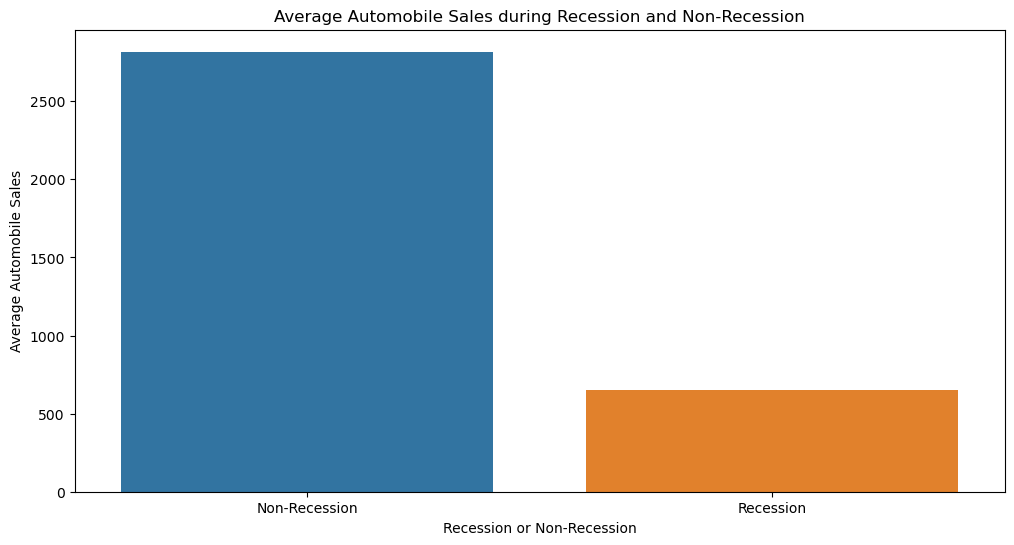

In [131]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Recession', y='Automobile_Sales', data=new_df)
plt.xlabel('Recession or Non-Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

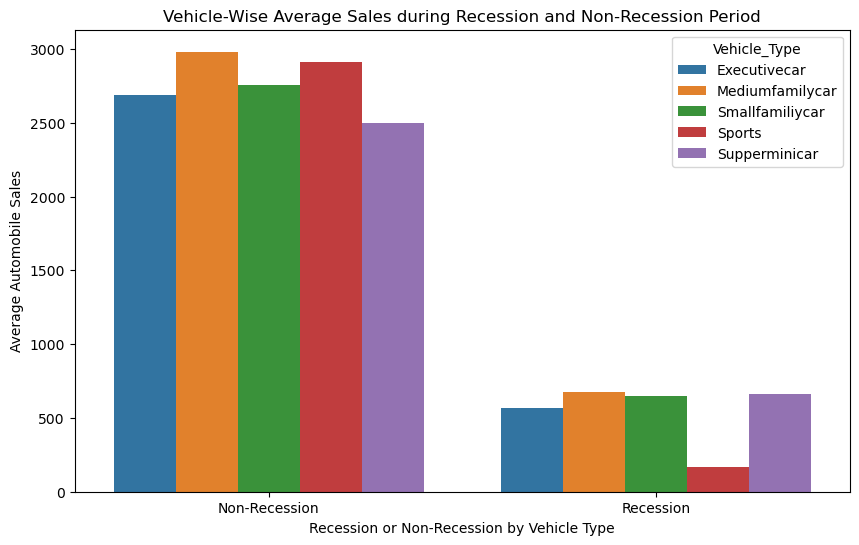

In [132]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession or Non-Recession by Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Average Sales during Recession and Non-Recession Period')

plt.show()

##### Inference:  There is a drastic decline in the overall sales of the automobiles during recession. However, the most affected type of vehicle is sports car and to some extent, executive cars.

##### 1.4 Using sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

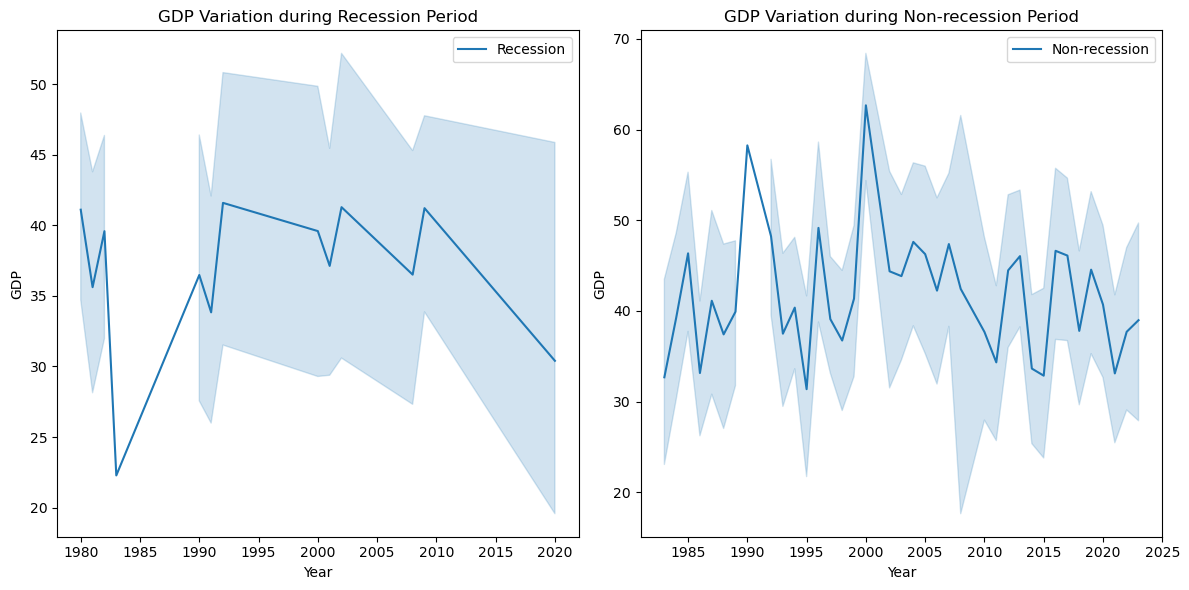

In [133]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot). 

#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-recession Period')

plt.tight_layout()
plt.show()

##### Inference: During recession, the GDP of the country was in a low range, might have afected the overall sales of the company.

##### 1.5 Developing a Bubble plot for displaying the impact of seasonality on Automobile Sale for non-recession years.

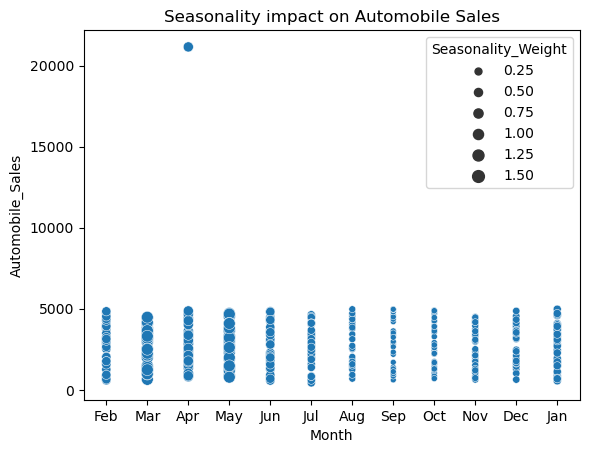

In [134]:
non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight'] #for bubble effect
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
#you can further include hue='Seasonality_Weight', legend=False)
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

##### Inference: From this plot, it is evident that seasonality has not affected the overall sales. However, there is a drastic raise in sales in the month of April.

##### 1.6 Using Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recession.

In [135]:
# Automobile Sales vs. Consumer Confidence

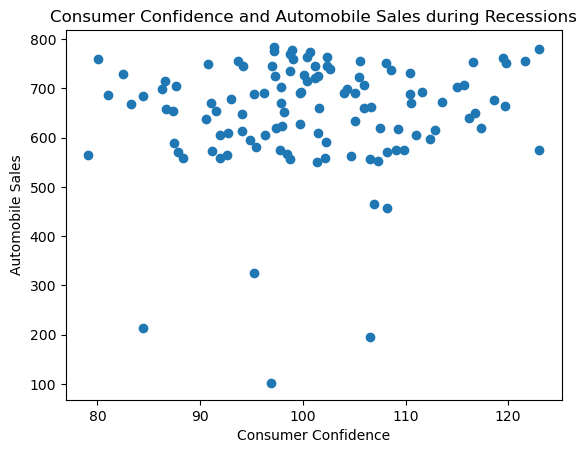

In [136]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

In [137]:
# Automobile Sales vs. Average Vehicle Price

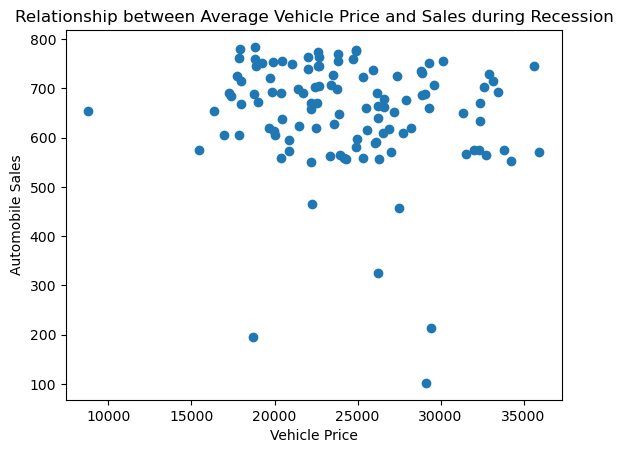

In [138]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recession')
plt.show()

##### Inference: There is not much correlation. 

##### 1.7 Pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

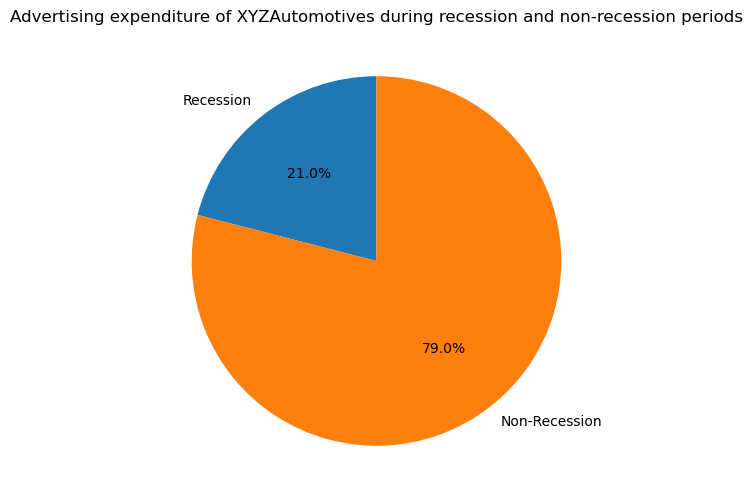

In [139]:
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising expenditure of XYZAutomotives during recession and non-recession periods')

plt.show()

##### Inference: It seems ABCAutomotives has been spending much more on the advertisements during non-recession periods as compared to during recession times.

##### 1.8 Developing a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

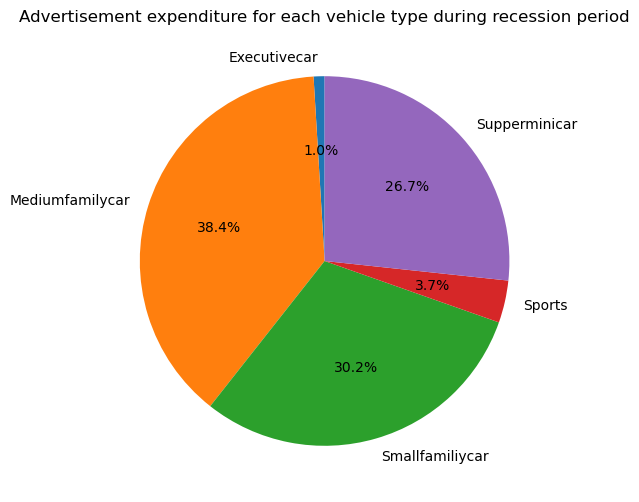

In [140]:
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertisement expenditure for each vehicle type during recession period')

plt.show()

##### Inference: During recession the advertisements were mostly focued on low price range vehicle.

##### 1.9 Developing a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

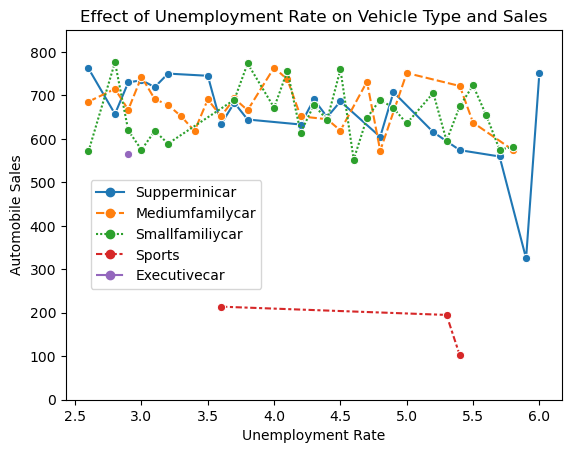

In [141]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
warnings.simplefilter(action='ignore', category=UserWarning)

##### Inference: During recession, the buying pattern changed, especially  the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar.

##### 1.10 Optional Choropleth to show the recession impact on various offices/city sales.

In [142]:
# Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1

### Author: Paul John Julongbayan